In [4]:
import pandas as pd

# Load the Excel file (replace 'Sales.xlsx' with the actual path if needed)
df = pd.read_excel('Sales.xlsx')

# Display the first 5 rows
print("First 5 rows of data:")
print(df.head())

# Check column data types and missing values
print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())


First 5 rows of data:
    OrderNumber  OrderDate  Ship Date  Customer Name Index      Channel  \
0   SO - 000225 2017-01-01 2017-01-13                   28    Wholesale   
1  SO - 0003378 2017-01-01 2017-01-06                    7  Distributor   
2  SO - 0003901 2017-01-01 2017-01-05                   12    Wholesale   
3  SO - 0005126 2017-01-01 2017-01-17                    5    Wholesale   
4  SO - 0005614 2017-01-01 2017-01-07                   27       Export   

  Currency Code Warehouse Code  Delivery Region Index  \
0           NZD         AXW291                     71   
1           NZD         AXW291                     54   
2           NZD         AXW291                     58   
3           USD         AXW291                     29   
4           NZD         AXW291                     31   

   Product Description Index  Order Quantity  Unit Selling Price  Unit Cost  
0                         11               6              2499.1   1824.343  
1                          7

In [5]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicates
df = df.drop_duplicates()


Number of duplicate rows: 0


In [6]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [7]:
df['Total Sales'] = df['Order Quantity'] * df['Unit Selling Price']
df['Total Cost'] = df['Order Quantity'] * df['Unit Cost']
df['Profit'] = df['Total Sales'] - df['Total Cost']
df['Margin (%)'] = (df['Profit'] / df['Total Sales']) * 100


In [17]:
import pandas as pd

# Create a date range from min to max OrderDate
date_range = pd.date_range(start=df['OrderDate'].min(), end=df['OrderDate'].max())

# Create the date table DataFrame
date_table = pd.DataFrame({'Date': date_range})

# Add date parts columns
date_table['Year'] = date_table['Date'].dt.year
date_table['Month Number'] = date_table['Date'].dt.month
date_table['Month Name'] = date_table['Date'].dt.month_name()
date_table['Quarter'] = date_table['Date'].dt.quarter
date_table['Weekday Number'] = date_table['Date'].dt.weekday  # Monday=0
date_table['Weekday Name'] = date_table['Date'].dt.day_name()

# Optional: display first 5 rows of the date table
print(date_table.head())


        Date  Year  Month Number Month Name  Quarter  Weekday Number  \
0 2017-01-01  2017             1    January        1               6   
1 2017-01-02  2017             1    January        1               0   
2 2017-01-03  2017             1    January        1               1   
3 2017-01-04  2017             1    January        1               2   
4 2017-01-05  2017             1    January        1               3   

  Weekday Name  
0       Sunday  
1       Monday  
2      Tuesday  
3    Wednesday  
4     Thursday  


In [19]:
# Group by year and month and aggregate
sales_profit_agg = df.groupby([df['OrderDate'].dt.year.rename('Year'), df['OrderDate'].dt.month.rename('Month')]).agg({
    'Total Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

print(sales_profit_agg.head())


   Year  Month  Total Sales       Profit
0  2017      1    3462955.3  1285885.909
1  2017      2    4085613.1  1422706.542
2  2017      3    5538079.3  2033290.138
3  2017      4    4084145.8  1542417.854
4  2017      5    4072340.4  1449836.852


In [20]:
# Create Year and Month columns in the original DataFrame
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month

# Now group by these new columns
sales_profit_agg = df.groupby(['Year', 'Month']).agg({
    'Total Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

print(sales_profit_agg.head())


   Year  Month  Total Sales       Profit
0  2017      1    3462955.3  1285885.909
1  2017      2    4085613.1  1422706.542
2  2017      3    5538079.3  2033290.138
3  2017      4    4084145.8  1542417.854
4  2017      5    4072340.4  1449836.852


In [21]:
# Sort by Year and Month to make sure shift works correctly
sales_profit_agg = sales_profit_agg.sort_values(['Year', 'Month']).reset_index(drop=True)

# Calculate previous year sales for the same month
sales_profit_agg['Sales Last Year'] = sales_profit_agg.groupby('Month')['Total Sales'].shift(1)

# Calculate YoY Sales Growth %
sales_profit_agg['YoY Sales Growth (%)'] = ((sales_profit_agg['Total Sales'] - sales_profit_agg['Sales Last Year'])
                                           / sales_profit_agg['Sales Last Year']) * 100

print(sales_profit_agg.head(12))


    Year  Month  Total Sales       Profit  Sales Last Year  \
0   2017      1    3462955.3  1285885.909              NaN   
1   2017      2    4085613.1  1422706.542              NaN   
2   2017      3    5538079.3  2033290.138              NaN   
3   2017      4    4084145.8  1542417.854              NaN   
4   2017      5    4072340.4  1449836.852              NaN   
5   2017      6    3806564.8  1429894.369              NaN   
6   2017      7    3923298.9  1510016.252              NaN   
7   2017      8    5154886.2  1924336.011              NaN   
8   2017      9    5152675.2  1940859.819              NaN   
9   2017     10    4992062.8  1935549.131              NaN   
10  2017     11    3486639.8  1312424.274              NaN   
11  2017     12    4821273.1  1890555.013              NaN   

    YoY Sales Growth (%)  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5                    NaN  
6   

In [22]:
top_cities = df.groupby('Delivery Region Index')['Total Sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 Cities by Sales:")
print(top_cities)


Top 5 Cities by Sales:
Delivery Region Index
23    2227843.8
6     2119424.4
35    2058320.4
67    1923563.3
24    1915643.9
Name: Total Sales, dtype: float64


In [23]:
top_customers = df.groupby('Customer Name Index')['Total Sales'].sum().sort_values(ascending=False).head(5)
bottom_customers = df.groupby('Customer Name Index')['Total Sales'].sum().sort_values(ascending=True).head(5)

print("\nTop 5 Customers by Sales:")
print(top_customers)

print("\nBottom 5 Customers by Sales:")
print(bottom_customers)



Top 5 Customers by Sales:
Customer Name Index
12    4081485.9
17    3821592.9
34    3676035.4
18    3643426.5
29    3608492.7
Name: Total Sales, dtype: float64

Bottom 5 Customers by Sales:
Customer Name Index
2     2364959.3
27    2584592.0
26    2688361.6
35    2692575.9
1     2694766.8
Name: Total Sales, dtype: float64


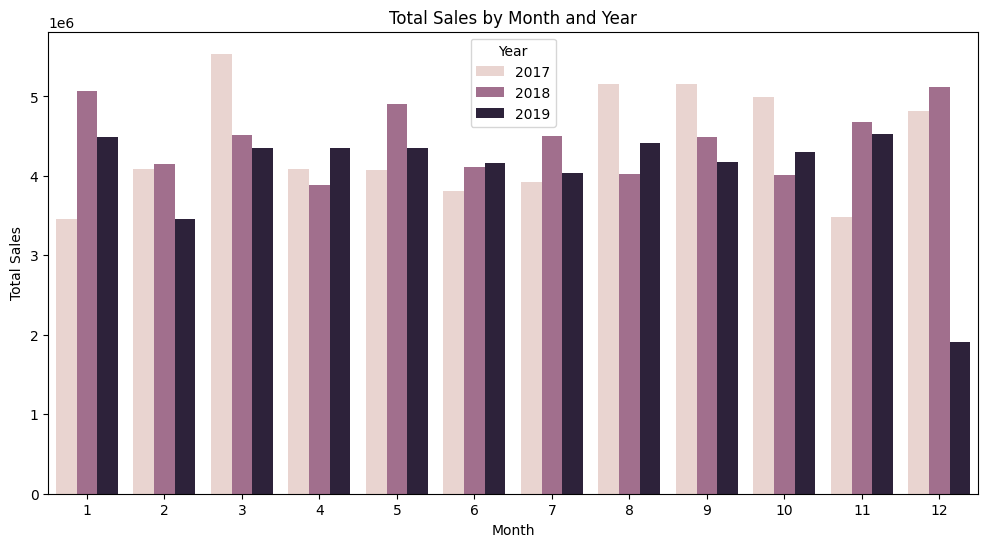

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(data=sales_profit_agg, x='Month', y='Total Sales', hue='Year')
plt.title('Total Sales by Month and Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


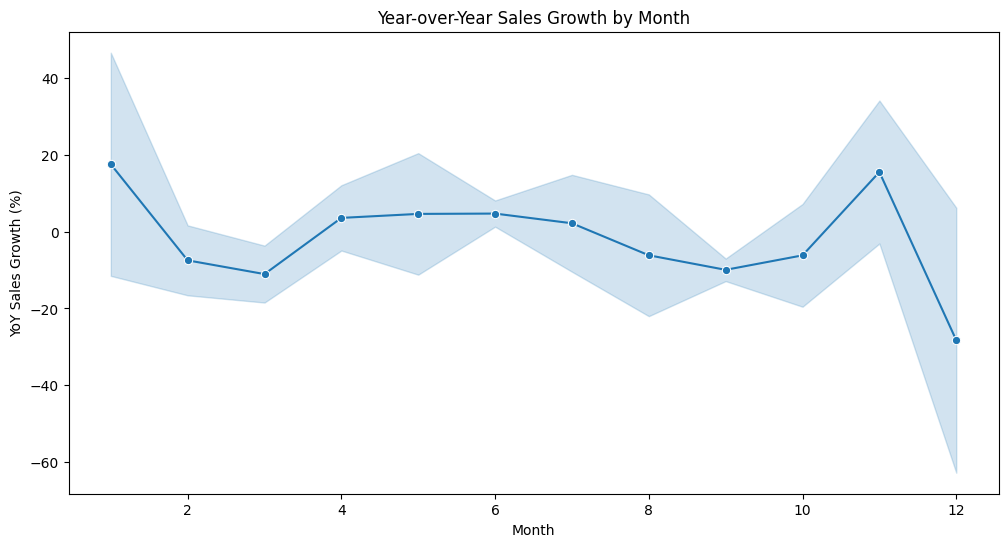

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_profit_agg, x='Month', y='YoY Sales Growth (%)', marker='o')
plt.title('Year-over-Year Sales Growth by Month')
plt.xlabel('Month')
plt.ylabel('YoY Sales Growth (%)')
plt.show()


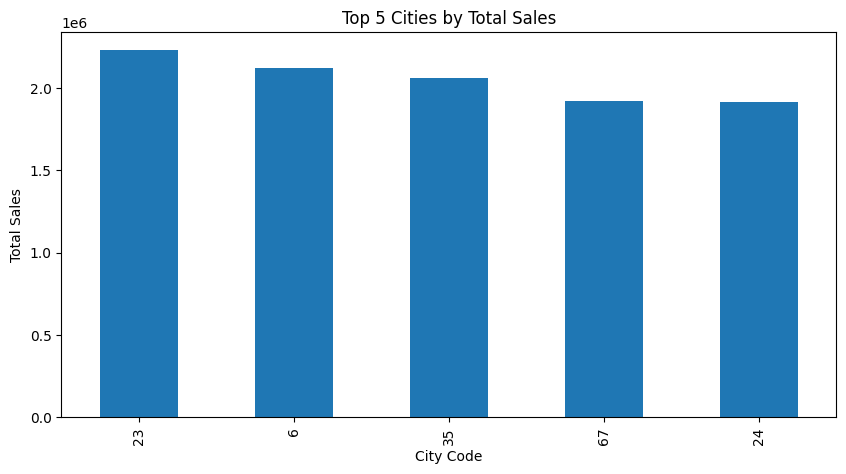

In [26]:
plt.figure(figsize=(10,5))
top_cities.plot(kind='bar')
plt.title('Top 5 Cities by Total Sales')
plt.xlabel('City Code')
plt.ylabel('Total Sales')
plt.show()


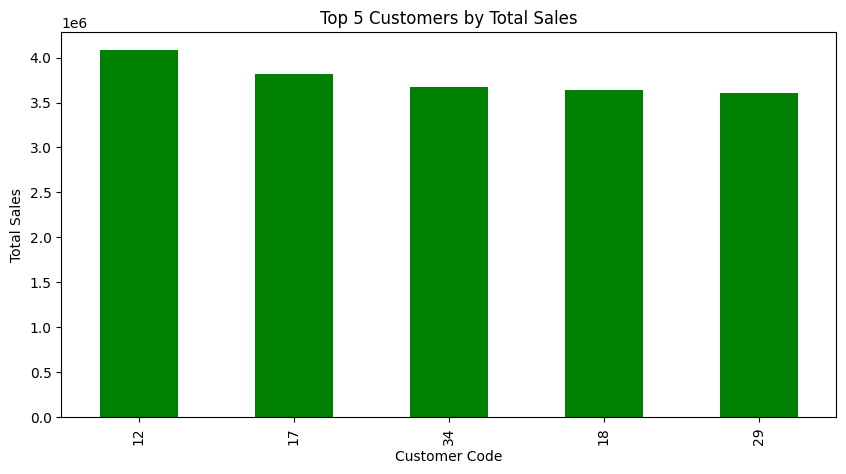

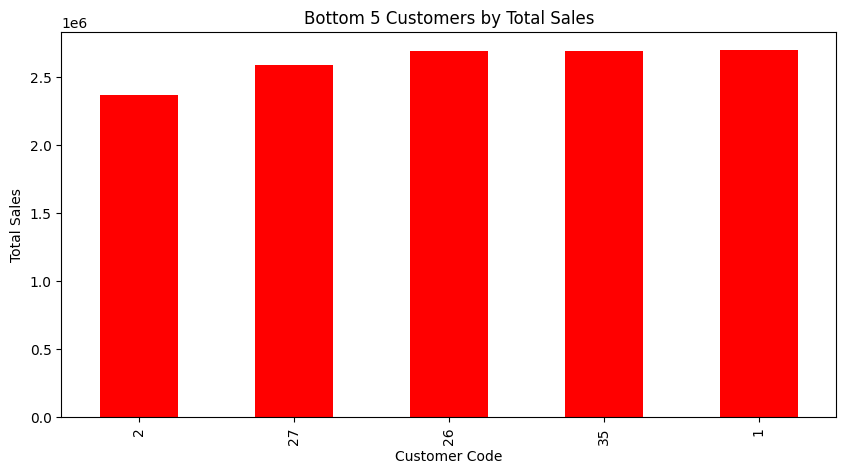

In [28]:
plt.figure(figsize=(10,5))
top_customers.plot(kind='bar', color='green')
plt.title('Top 5 Customers by Total Sales')
plt.xlabel('Customer Code')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(10,5))
bottom_customers.plot(kind='bar', color='red')
plt.title('Bottom 5 Customers by Total Sales')
plt.xlabel('Customer Code')
plt.ylabel('Total Sales')
plt.show()
